# Problem Statement:

#### Predicting using Logistic Regression to whether someone will survive using the data available in the dataset.

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

## Part-1 Data Processing and Pre-Processing

#### 1 - Loading the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Vyas\1_Assignment\ML FT Projects\Logistic Regression\P4_Titanic_Survival_Analysis\Python_Project_4_Log.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2 - Printing the column names

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### 3 - Describing and checking statistical values

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 4 - Checking the null values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 5 - Handling the null values

Replacing missing age value with mean and missing cabin and embark value with mode.

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [7]:
df['Cabin'].fillna(value=df.Cabin.mode().iloc[0],inplace=True)

In [8]:
df['Embarked'] = df['Embarked'].fillna(df.Embarked.mode().iloc[0])

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Part - 2 Working with the Model

In [10]:
df.drop(['Name','Ticket'], axis = 1, inplace=True)

In [11]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

In [12]:
df['Cabin'] = LabelEncoder().fit_transform(df['Cabin'])

In [13]:
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

#### 1 - Creating Target data and Feature Data

In [14]:
X = df.drop(['Survived'], axis=1)
y = df[['Survived']]

#### 2 - Split data into training and testing set

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

#### 3 - Creating Logistic Regression Model

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
pred = model.predict(X_test)

In [19]:
model.score(X_train,y_train)

0.7865168539325843

In [20]:
model.score(X_test,y_test)

0.8100558659217877

#### 4 - Displaying Confusing Matrix

In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [22]:
con_mat = confusion_matrix(y_test,pred)

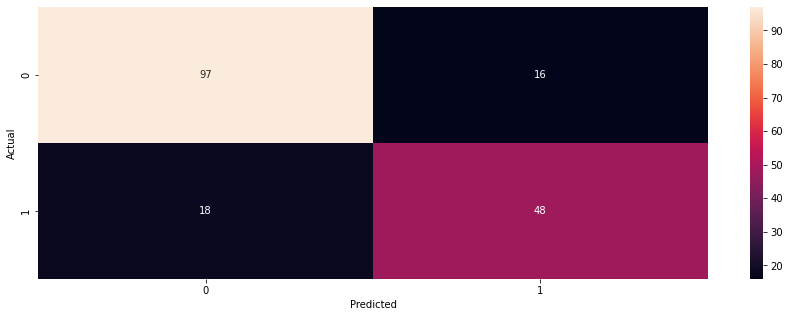

In [23]:
plt.figure(figsize = (15,5))
sns.heatmap(con_mat, annot = True);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 5 - Finding the Accuracy Score

In [24]:
accuracy_score(pred,y_test)

0.8100558659217877

#### 6 - Finding Precision Score

In [25]:
precision_score(pred,y_test)

0.7272727272727273

#### 7 - Finding Recall Score

In [26]:
recall_score(pred,y_test)

0.75

#### 8 - Finding F1 Score

In [27]:
f1_score(pred,y_test)

0.7384615384615384

#### 9 - Finding Probablity of Testing Data

In [28]:
probab = model.predict_proba(X_test)

#### 10 - Finding ROC Curve and AUC Score

In [29]:
from sklearn.metrics import roc_curve,roc_auc_score

Text(0, 0.5, ' Positive Rate')

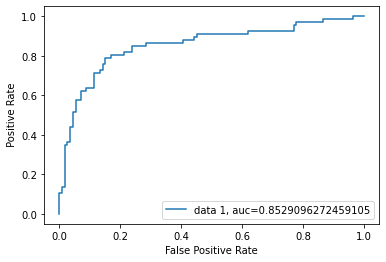

In [30]:
y_probab = model.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_probab)
auc = roc_auc_score(y_test, y_probab)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")